<a href="https://colab.research.google.com/github/araujorobert/Time-series-course/blob/main/3_Caracter%C3%ADsticas_fundamentales_de_las_series_de_ti%C3%A9mpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing packages

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts      # Herramientas estadisticas
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb
sb.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading and Transforming our data

In [ ]:
# Importamos los datos
data = pd.read_csv('Index2018.csv')
df = data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
# Transformamos la columna "date" de string a objeto tipo fecha
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
# Establecemos la fecha como indice del dataframe
df = df.set_index('date')
# Aplicamos la opcion business day para no tener problemas con los fines de semana
df = df.asfreq('b')
# cambiamos los valores nulos usando la siguiente observacion
df = df.fillna(method='ffill')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
# Reducimos la dimension del dataframe a una sola con la columna "spx"
df['market_value'] = df['spx']
df.drop(['spx','dax','ftse','nikkei'],axis=1,inplace=True)
#del df['spx']
#del df['ftse']
#del df['dax']
#del df['nikkei']

df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Conjunto de entrenamiento y validación

In [ ]:
# Usamos la regla del 80/20
size = int(len(df)*0.8)
df_train, df_test = df[:size], df[size:]

# Mostramos el conjunto de prueba
print('Proporción de datos del conjunto de entrenamiento:')
print(round(len(df_train)/len(df),3))
print('Proporción de datos del conjunto de prueba:')
round(len(df_test)/len(df),3)

Proporción de datos del conjunto de entrenamiento:
0.8
Proporción de datos del conjunto de prueba:


0.2

### Ruido Blanco (White Noise)

In [ ]:
wn = np.random.normal(loc=df_train['market_value'].mean(), scale=df_train['market_value'].std(), size=len(df_train))

In [ ]:
df_train['wn'] = wn
df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,wn
date,,
1994-01-07,469.900000,842.741497
1994-01-10,475.270000,1477.913012
1994-01-11,474.130000,1276.874355
1994-01-12,474.170000,1262.012285
1994-01-13,472.470000,566.212684
...,...,...
2013-04-01,1562.173837,1125.438476
2013-04-02,1570.252238,1358.503684
2013-04-03,1553.686978,881.999585


In [ ]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.965846
std,292.559287,293.916780
min,438.920000,-93.514109
25%,914.620000,898.409497
50%,1144.650000,1100.332169
75%,1316.280729,1299.309808
max,1570.252238,2223.471774


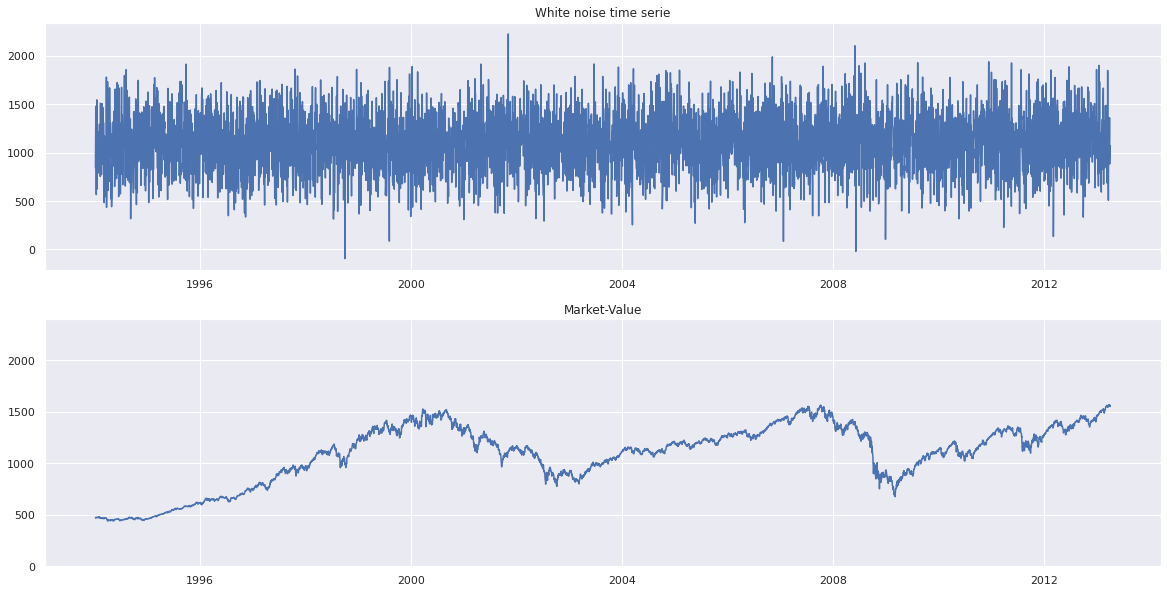

In [ ]:
# Ploteamos esto
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(df_train['wn'])
plt.title('White noise time serie')

plt.subplot(2,1,2)
plt.plot(df_train['market_value'])
plt.title('Market-Value')
plt.ylim(0,2400)
plt.show()

### Caminata Aleatoria (Random Walk)

In [ ]:
rw = pd.read_csv('RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [ ]:
# Convertimos date a formato fecha
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)
# Establecemos date como index
rw.set_index('date', inplace=True)
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [ ]:
# Business day
rw=rw.asfreq('b')

rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
# agregamos esta variable al dataset anterior
df_train['rw'] = rw['price']
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market_value,wn,rw
date,,,
1994-01-07,469.90,842.741497,1122.139662
1994-01-10,475.27,1477.913012,1080.347860
1994-01-11,474.13,1276.874355,1082.095245
1994-01-12,474.17,1262.012285,1083.639265
1994-01-13,472.47,566.212684,1067.146255


Por la definición de la caminata aleatoria:
$$
P_t = P_{t-1} + \epsilon
$$

Tal que epsilon es ruido blanco:
$$
\epsilon\rightarrow N(\mu,\sigma^2)
$$

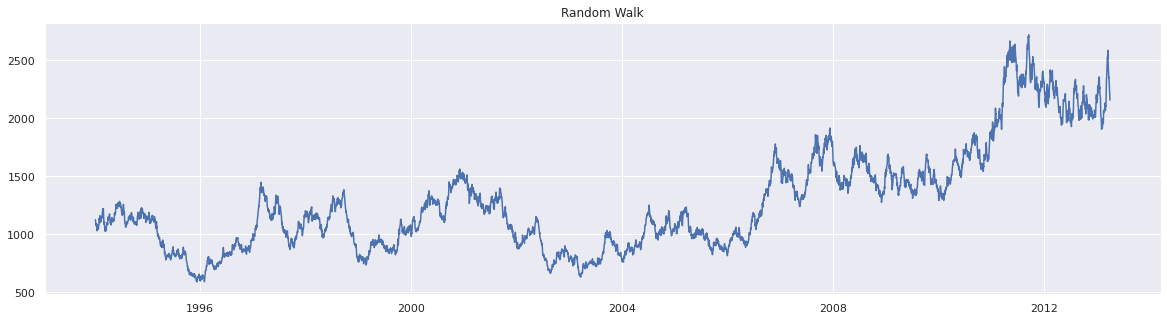

In [ ]:
# Ploteamos el random-walk
plt.figure(figsize=(20,5))
plt.plot(df_train['rw'])
plt.title('Random Walk')
plt.show()

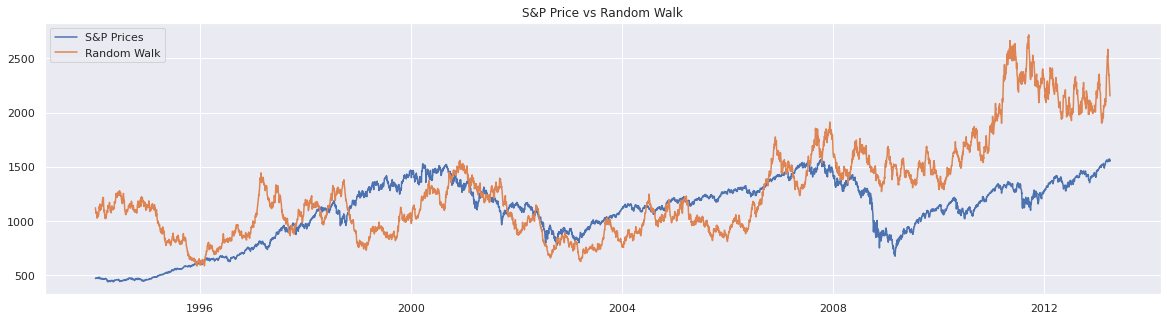

In [ ]:
# Comparando ambas:
plt.figure(figsize=(20,5))
plt.plot(df_train['market_value'], label='S&P Prices')
plt.plot(df_train['rw'], label='Random Walk')
plt.title('S&P Price vs Random Walk')
plt.legend()
plt.show()

### Eficiencia de Mercado
- Si los precios se asemejan a una caminata aleatoria los precios no se pueden predecir con gran precisión.
- Si los precios pueden predecirse con gran precisión en el futuro habrá oportunidades de arbitraje.

**Arbitraje**: Cuando los inversores pueden comprar o vender productos y obtener una ganancia segura mientras el precio se ajusta. 

#### ¿Cómo simular una caminata aleatoria?

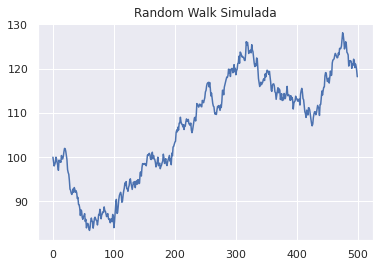

In [ ]:
# Generamos 500 pasos aleatorios para la caminara, con media 0 y desv tipica 1
steps = np.random.normal(loc=0, scale=1, size=500)
 
# Ponemos el primer elemento a 0 para que el precio inicial sea el que pongamos nosotros
steps[0]=0
 
# Simulando los precios P con un precio inicial de 100
P = 100 + np.cumsum(steps)
 
# Plot
plt.plot(P)
plt.title("Random Walk Simulada")
plt.show()

### Estacionariedad (Stacionarity)
Para saber si una serie temporal es estacionaria se hace la prueba de Dickey-Fuller. Esta es un contraste de hipotesis que plantea lo siguiente:

$$
H_0: La\ serie\ no\ es\ estacionaria\\
H_1: La\ serie\ es\ estacionaria
$$

Matemáticamente esto se escribe en términos del coeficiente de autocorrelación de un retrazo:

$$
H_0: \varphi_1 = 1 \\
H_1: \varphi_1 < 0
$$

- Un retrazo es el periodo de tiempo entre dos valores consecutivos  $\{x_t, x_{t-1}\}$ de una serie temporal
- El coeficiente de autocorrelación de un retrazo seria entonces la correlación entre dichos valores: $\varphi_1=corr(x_t, x_{t-1})$

Si la correlación entre momentos consecutivos es cercana a 1 quiere decir que la serie de tiempo tiene memoria, porque la siguiente observación depende de la observación anterior.

- Para hacer el contraste se calcula un estadistico $\lambda_0$ y se compara con el valor critico $\lambda_{crit}$.
  - si $\lambda_0$ < $\lambda_{crit}$ rechazamos la hipotesis nula
  - si $\lambda_0$ > $\lambda_{crit}$ no la rechazamos
- Si usamos el método del p-valor las condiciones son:
  - si el p-valor > $\alpha$ no rechazamos la hipotesis nula
  - si el p-valor < $\alpha$ rechazamos la hipotesis nula

In [ ]:
# Aplicando el contraste a la columna "market_value"
prueba1 = sts.adfuller(df_train['market_value'])
print('El p-valor es:')
p_valor = prueba1[1]
print(round(p_valor,3))
if p_valor > 0.1:
  print('El p-valor es mayor a 0.1, por ende, no rechazamos la hipotesis nula')
  print('Es decir, la serie SI es estacionaria')
else:
  print('El p-valor es menor a 0.1, por ende, SI rechazamos la hipotesis nula')
  print('Es decir, la serie NO es estacionaria')

El p-valor es:
0.412
El p-valor es mayor a 0.1, por ende, no rechazamos la hipotesis nula
Es decir, la serie SI es estacionaria


In [ ]:
# Aplicando el contraste a la columna ruido blanco
prueba2 = sts.adfuller(df_train['wn'])
print('El p-valor es:')
p_valor = prueba2[1]
print(round(p_valor,3))
if p_valor > 0.1:
  print('El p-valor es mayor a 0.1, por ende, no rechazamos la hipotesis nula')
  print('Es decir, la serie SI es estacionaria')
else:
  print('El p-valor es menor a 0.1, por ende, SI rechazamos la hipotesis nula')
  print('Es decir, la serie NO es estacionaria')

El p-valor es:
0.0
El p-valor es menor a 0.1, por ende, SI rechazamos la hipotesis nula
Es decir, la serie NO es estacionaria


In [ ]:
# Aplicando el contraste a la columna "Random-Walk"
prueba3 = sts.adfuller(df_train['rw'])
print('El p-valor es:')
p_valor = prueba3[1]
print(round(p_valor,3))
if p_valor > 0.1:
  print('El p-valor es mayor a 0.1, por ende, no rechazamos la hipotesis nula')
  print('Es decir, la serie SI es estacionaria')
else:
  print('El p-valor es menor a 0.1, por ende, SI rechazamos la hipotesis nula')
  print('Es decir, la serie NO es estacionaria')

El p-valor es:
0.616
El p-valor es mayor a 0.1, por ende, no rechazamos la hipotesis nula
Es decir, la serie SI es estacionaria


## Seasonality (Estacionalidad)
El **método de descomposición clásica** consiste en descomponer una serie de tiempo en 3 componentes:
- La tendencia: es una curva continua que nos explica de manera clara el comportamiento de la serie.
- La estacionalidad: son los patrones repetitivos que algunas series tienen cada cierto periodo de tiempo.
- El error aleatorio: es lo que no se alcanza a explicar por los dos anteriores y se atribuye a sucesos aleatorios que alteran nuestra serie de tiempo.

Para la descomposición clásica hay dos métodos, el **metodo aditivo** y el **metodo multiplicativo**.
- Metodo aditivo: nos dice que la serie se compone como la suma de la tendencia, la estacionalidad y el error.
$$
x_t = \mu_t + S_t + \epsilon_t 
$$
- Metodo multiplicativo: este nos dice que la serie se compone del producto de los tres anteriores.
$$
x_t = \mu_t \cdot S_t \cdot \epsilon_t 
$$

<Figure size 1584x864 with 0 Axes>

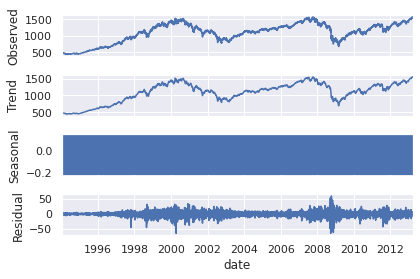

In [ ]:
# Descomposición clásica por el método aditivo
s_a_d = seasonal_decompose(df_train['market_value'], model='additive')
plt.figure(figsize=(22,12))
s_a_d.plot()
plt.show()

<Figure size 1584x864 with 0 Axes>

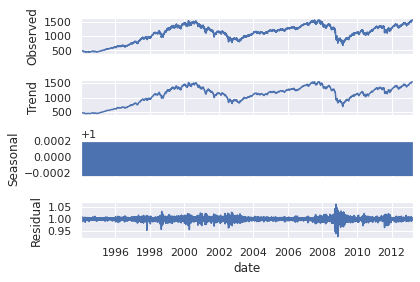

In [ ]:
# Descomposición clásica por el método multiplicativo
s_a_d = seasonal_decompose(df_train['market_value'], model='multiplicative')
plt.figure(figsize=(22,12))
s_a_d.plot()
plt.show()

## Filtro de Hodrick-Prescott
Este metodo nos permite descomponer la serie en dos componentes, la tendencia y un componente ciclico:
$$
x_t=\mu_t+c_t
$$

El componente ciclico se interpreta como las fluctuaciones de la serie de tiempo al rededor de la tendencia.

Lo anterior depende de un parametro $\lambda$ el cual mide las variaciones en las tasas de crecimiento del componente de tendencia. Este parametro tendra valores diferentes dependiendo del periodo entre observaciones, por ejemplo:
- trimestralmente $\lambda=1600$
- anualmente $\lambda=6.25$
- mensualmente $\lambda =129600$

In [ ]:
# Cargamos los datos
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


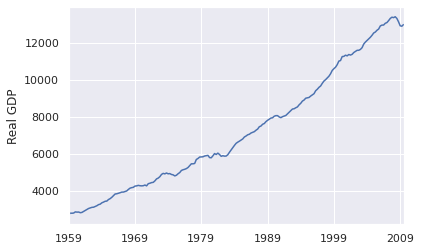

In [ ]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Real GDP');

## Descomposición aditiva mediante el filtro de Hodrick Prescott

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [ ]:
df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


[]

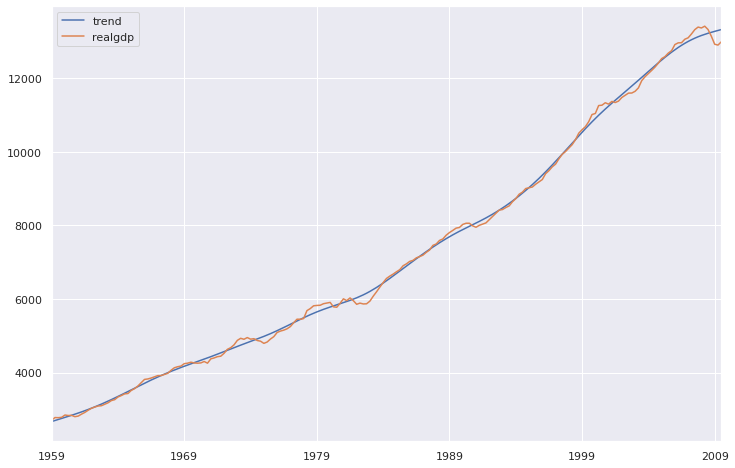

In [ ]:
df[['trend','realgdp']].plot(figsize=(12,8))
plt.plot()

Aquí se observa lo que dijimos arriba, la componente ciclica son las fluctuaciones de la serie en torno a la tendencia.

[]

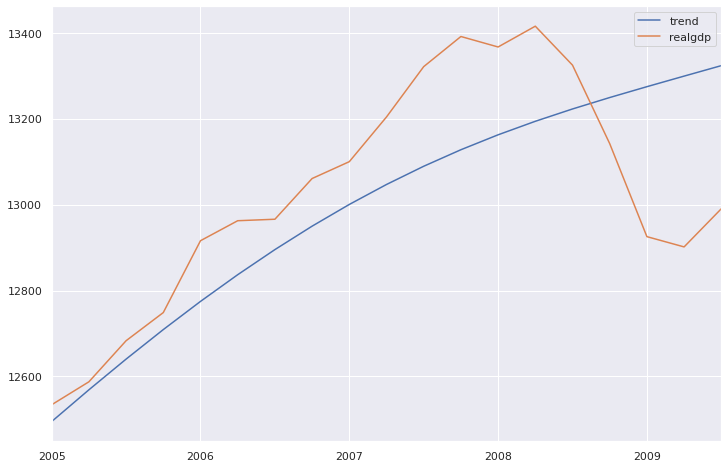

In [ ]:
# Analicemos la ultima parte de la serie para ver la caida devido a la recesión de 2008
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,8))
plt.plot()

## Analizando ventas de vuelos

In [ ]:
# Importing data
data = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


[]

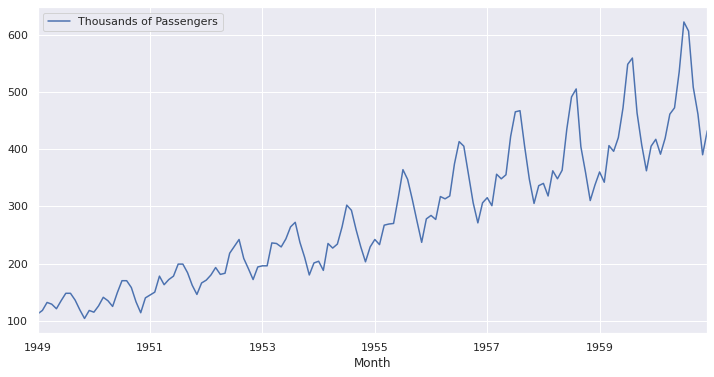

In [ ]:
data.plot(figsize=(12,6))
plt.plot()

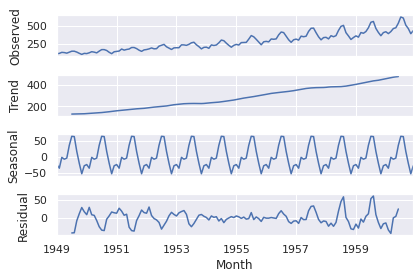

In [ ]:
# Separamos mediante el descomposición clasica para estudiar la estacionalidad
s_a_d = seasonal_decompose(data['Thousands of Passengers'], model='additive')
s_a_d.plot()
plt.show()

- El componente de tendencia nos muestra el patrón de crecimiento general
- El componente estacional nos dice que en efecto hay patrones repetitivos muy regulares cada cierto periodo de tiempo (fechas de vacaciones o fiestas por ejemplo)
- El componente residual nos esta diciendo que los datos son mas ruidosos al comienzo y al final de nuestra serie y los datos parecen ser mas limpios de 1953 a 1957 por ejemplo.

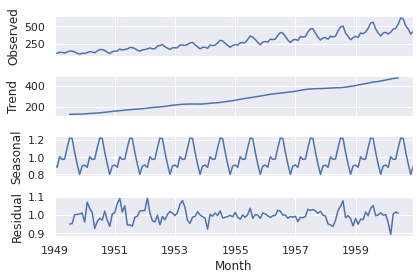

In [ ]:
# Separamos mediante el metodo multiplicativo
s_a_d = seasonal_decompose(data['Thousands of Passengers'], model='multiplicative')
s_a_d.plot()
plt.show()

- Cuando la tendencia es lineal, combiene usar el método aditivo
- Cuando no es lineal, combiene usar el multiplicativo

## Función de Autocorrelación (ACF)
Esta nos mide que tan relacionados estan los valores de una serie de tiempo dado cierto retrazo k, donde k son los periodos de tiempo entre observaciones. Esta autocorrelación se calcula como $corr(x_t,x_{t-k})$

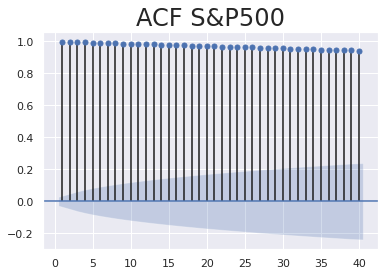

In [ ]:
sgt.plot_acf(df_train.market_value, lags=40, zero=False)
plt.title('ACF S&P500', size=24)
plt.show()

- Aquí vemos que la correlación apenas cambia en el periodo de 40 dias, lo que implica que incluso los precios despues de transcurrido un mes siguen siendo buenos estimadores del valor anterior.
- El area sombreada azul representa el nivel de significación de los valores de autocorrelación, es decir, mide si son significativamente diferentes de cero, lo que suguiere la existencia de correlacion para ese retrazo especifico. Vemos que esta area se expande conforme pasa el tiempo, esto es porque a mayor distancia en el tiempo mas improbable es que esta correlación persista, es decir, los precios de hoy suelen estar mas cerca de los precios de ayer. Debemos asegurarnos que el coeficiente de autocorrelación en los retrasos mas altos sean suficiente mente mayores para que sean significativamente diferentes de cero.

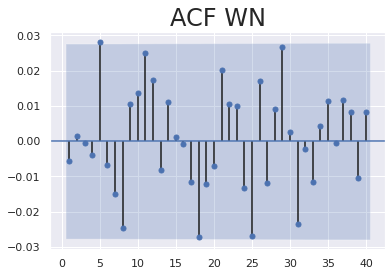

In [ ]:
sgt.plot_acf(df_train.wn, lags=40, zero=False)
plt.title('ACF WN', size=24)
plt.show()

Notemos como todos los coeficientes caen dentro del area azul, lo que sugiere que no hay autocorrelación apara ningun retrazo o dicho en palabras simples, los datos no estan temporalmente relacionados, son aleatorios.

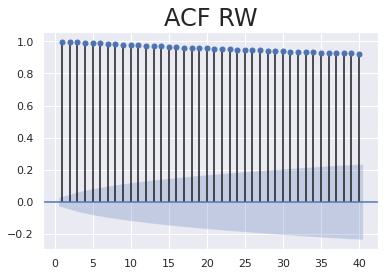

In [ ]:
sgt.plot_acf(df_train.rw, lags=40, zero=False)
plt.title('ACF RW', size=24)
plt.show()

Recoordemos que la caminada aleatoria era una serie de tiempo con una componente de ruido blanco, por lo cual esperariamos que su grafico ACF se pareciera al de una serie de tiempo regular.

El hacer este analisis es importante porque nos ayuda a diferenciar entre series de tiempo regulares y ruido blanco.

## Auto-correlación Parcial (FACP)
Sabemos que en una serie de tiempo la k ésima observacion viene afectada por la k-1 ésima, por la k-2 ésima y asi susecivamente. Todos los periodos anteriores afectan de un modo u otro a la observacion actual y como todos estan mezclados es dificil distingir cual efecto proviene de cual periodo en especifico. Si queremos saber especificamente como el dia 2 afecto al dia 5 por ejemplo, no nos sirve hacer corr(2,5) por que ahi vienen incluidos los dias 3 y 4. Lo que debemos hacer es una "autocorrelacion parcial", pues esta solo toma en cuenta los dias 2 y 5.

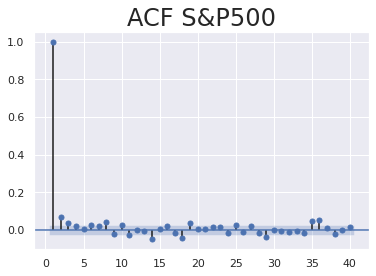

In [ ]:
sgt.plot_pacf(df_train.market_value, lags=40, zero=False, method=('ols'))
plt.title('ACF S&P500', size=24)
plt.show()

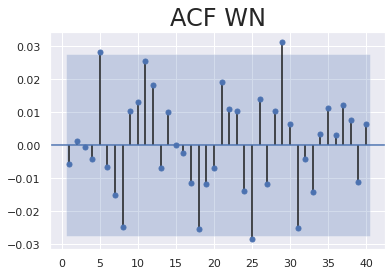

In [ ]:
sgt.plot_pacf(df_train.wn, lags=40, zero=False, method=('ols'))
plt.title('ACF WN', size=24)
plt.show()

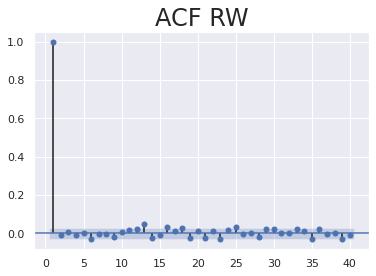

In [ ]:
sgt.plot_pacf(df_train.rw, lags=40, zero=False, method=('ols'))
plt.title('ACF RW', size=24)
plt.show()